In [20]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize
from IPython import display
import time

In [21]:
# calculates distance matrix from a list of coord tuples
def calc_d_mat(cc):
    d=np.zeros((len(cc),len(cc)))
    for i in range(N):
        for j in range(N):
            d[i,j]=np.sqrt((cc[i][0]-cc[j][0])**2+(cc[i][1]-cc[j][1])**2)
    return(d)

# error function compares distance matrix from coord list estimate to target dist mat
def error_fun(e_d,t_d):
    diff=np.tril(t_d)-np.tril(e_d)
    return(sum(sum(diff**2)))

# objective function
def objfun(x,t_d):
    clist=x1d2clist(x)
    d=calc_d_mat(clist)
    e=error_fun(d,t_d)
    return(e)

def x1d2clist(x1d):
    # turn 1d array into list of tuple coords
    xc = x1d[:len(x1d)//2]
    yc = x1d[len(x1d)//2:]
    clist=list(zip(xc,yc))
    return(clist)

def clist2x1d(clist):
    # turn list of tuple coords into 1d array
    estxy=list(zip(*clist))
    xe=estxy[0]
    ye=estxy[1]
    exy=xe+ye
    x1d=np.array(exy)
    return(x1d)

def centreCoM(cc):
    # centre list of coords at its CoM 
    x,y=list(zip(*cc))
    xm=np.mean(x)
    ym=np.mean(y)
    x0=x-xm
    y0=y-ym
    return(list(zip(x0,y0)))


def cc_err(e,t):
    er=0
    for i in range(len(e)):
        er=er+np.sqrt((e[i][0]-t[i][0])**2+(e[i][1]-t[i][1])**2)
    return(er)

def rot_cc(cc,th):
    if type(th)==np.ndarray:
        th=th[0]
    rotmat=np.array(((np.cos(th),-np.sin(th)),(np.sin(th),np.cos(th))))
    cc_r=[np.matmul(rotmat,i).tolist() for i in cc]
    return(cc_r)

def rot_obj(th,est_cc):
    est_cc_r=rot_cc(est_cc,th)
    return(cc_err(est_cc_r,target_cc))

def match_rot(est_cc):
    res=optimize.minimize(rot_obj,0.1,est_cc)
    return(rot_cc(est_cc,res.x))

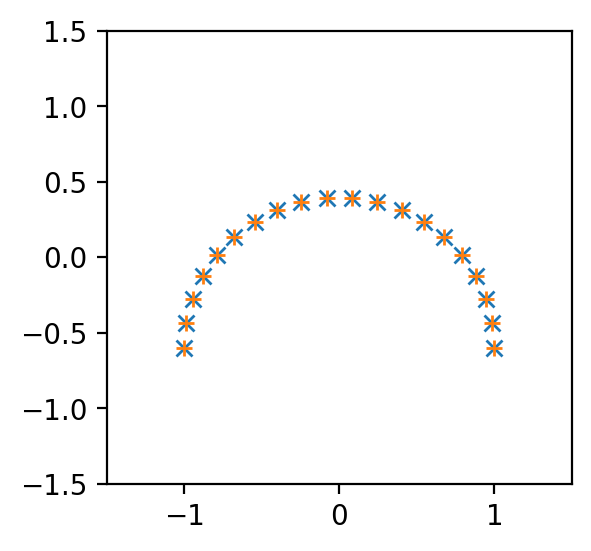

Optimization terminated successfully.
1.1507492107370873e-11
True
0


In [22]:
    
# build 2d test data, points on a semicircle
N=20
r=1
th=np.linspace(np.pi,0,N)
target_cc=list(zip(r*np.cos(th),r*np.sin(th)))
target_cc=centreCoM(target_cc)

#ideal obs matrix (used in fitting)
target_d=calc_d_mat(target_cc)            

#initial state (some curvature is helpful)
r=5
th=np.linspace(np.pi-np.pi/3,np.pi/3,N)
est_cc=list(zip(r*np.cos(th),r*np.sin(th)))

# xe=np.linspace(-1,1,N)
# ye=np.ones(N)*0.0
# est_cc=list(zip(xe,ye))
est_cc=centreCoM(est_cc)
est_obj_x1d=clist2x1d(est_cc)

# plotting
fig,ax=plt.subplots(1,1,figsize=(3,3),dpi=200)
hdisplay = display.display("", display_id=True)
xt,yt=list(zip(*target_cc))
ax.plot(xt,yt,'x')
xe,ye=list(zip(*est_cc))
h=ax.plot(xe,ye,'+')
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))

# fitting
status=1
while status>0:
    result=optimize.minimize(objfun,est_obj_x1d,target_d,method='CG',options={'maxiter':1})
    est_obj_x1d=result.x;
    # update figure
    optclist=match_rot(centreCoM(x1d2clist(result.x)))
    xo,yo=list(zip(*optclist))
    h[0].set_xdata(xo)
    h[0].set_ydata(yo)
    hdisplay.update(fig)

    status=result.status
plt.close(fig)

print(result.message)
print(result.fun)
print(result.success)
print(result.status)